### 데이터 전처리
<span style="font-color:black"></span>

1. movies_train.csv / movies_test.csv
 - title : 영화의 제목
 - distributor : 배급사
 - genre : 장르
 - release_time : 개봉일
 - time : 상영시간(분)
 - screening_rat : 상영등급
 - director : 감독이름
 - dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
 - dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
 - num_staff : 스텝수
 - num_actor : 주연배우수
 - box_off_num : 관객수


2. 영화 관객 수 예측 목표
 - 개봉일(계절요인 파악 가능?), 이전 제작 영화 평균 관객 수, 장르, 관객 수 정도가 유의미할 것으로 판단 : 상관분석 진행 後 확인
 
 
3. 제출방식
 - submission.csv

In [273]:
import pandas as pd

In [274]:
import numpy as np

In [275]:
import matplotlib.pyplot as plt

In [476]:
train = pd.read_csv('./movies_train.csv') #처음 불러올 때, 파이썬 위치 설정 중요

In [477]:
print(train)

         title   distributor genre release_time  time screening_rat director  \
0       개들의 전쟁      롯데엔터테인먼트    액션   2012-11-22    96      청소년 관람불가      조병옥   
1         내부자들        (주)쇼박스   느와르   2015-11-19   130      청소년 관람불가      우민호   
2    은밀하게 위대하게        (주)쇼박스    액션   2013-06-05   123       15세 관람가      장철수   
3     나는 공무원이다        (주)NEW   코미디   2012-07-12   101        전체 관람가      구자홍   
4         불량남녀  쇼박스(주)미디어플렉스   코미디   2010-11-04   108       15세 관람가      신근호   
..         ...           ...   ...          ...   ...           ...      ...   
595         해무        (주)NEW   드라마   2014-08-13   111      청소년 관람불가      심성보   
596       파파로티        (주)쇼박스   드라마   2013-03-14   127       15세 관람가      윤종찬   
597      살인의 강     (주)마운틴픽쳐스    공포   2010-09-30    99      청소년 관람불가      김대현   
598     악의 연대기     CJ 엔터테인먼트   느와르   2015-05-14   102       15세 관람가      백운학   
599        베를린     CJ 엔터테인먼트    액션   2013-01-30   120       15세 관람가      류승완   

     dir_prev_bfnum  dir_prev_num  num_

In [478]:
test = pd.read_csv('./movies_test.csv')

In [479]:
submission = pd.read_csv('./submission.csv')

In [280]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,nan,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.2,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.0,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.0,1,251,2,483387


In [281]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,300529.0,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,342700.2,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4206610.7,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,691342.0,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,31738.0,1,380,1


In [282]:
submission.head()

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


In [283]:
print(train.shape) #shape : 데이터 프레임 행, 열 개수 저장 속성 확인
print(test.shape)
print(submission.shape)

(600, 12)
(243, 11)
(243, 2)


In [284]:
train.info() #column별 정보 알려주는 함수

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [300]:
test.info() #7번 컬럼 값 채워야 함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    int64  
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 21.0+ KB


In [286]:
train.describe() # e+xx 제곱승

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.0,270.0,600.0,600.0,600.0,600.0
mean,100.9,1050442.9,0.9,151.1,3.7,708181.8
std,18.1,1791408.3,1.2,165.7,2.4,1828005.9
min,45.0,1.0,0.0,0.0,0.0,1.0
25%,89.0,20380.0,0.0,17.0,2.0,1297.2
50%,100.0,478423.6,0.0,82.5,3.0,12591.0
75%,114.0,1286568.6,2.0,264.0,4.0,479886.8
max,180.0,17615314.0,5.0,869.0,25.0,14262766.0


In [287]:
pd.options.display.float_format = '{:.1f}'.format #원래 숫자로 변경

In [288]:
train['release_time'] = train['release_time'].str.replace('-', '') #release_time 내 - 문자 제거

In [289]:
test['release_time'] = test['release_time'].str.replace('-', '')

In [298]:
train = train.astype({'release_time':'int64'})

In [299]:
test = test.astype({'release_time':'int64'})

In [480]:
train[['genre','box_off_num']].groupby('genre').mean().sort_values('box_off_num') #train 데이터와 장르, 컬럼수를 선택, groupby로 장르를 묶고, 평균값으로 정렬 

,box_off_num
genre,
뮤지컬,6627.00000
다큐멘터리,67172.25806
서스펜스,82611.00000
애니메이션,181926.66667
멜로/로맨스,425968.03846
미스터리,527548.17647
공포,590832.52381
드라마,625689.79186
코미디,1193914.00000


In [120]:
pd.reset_option('display.float_format') #복구

### 상관분석

묶이는 개수 확인

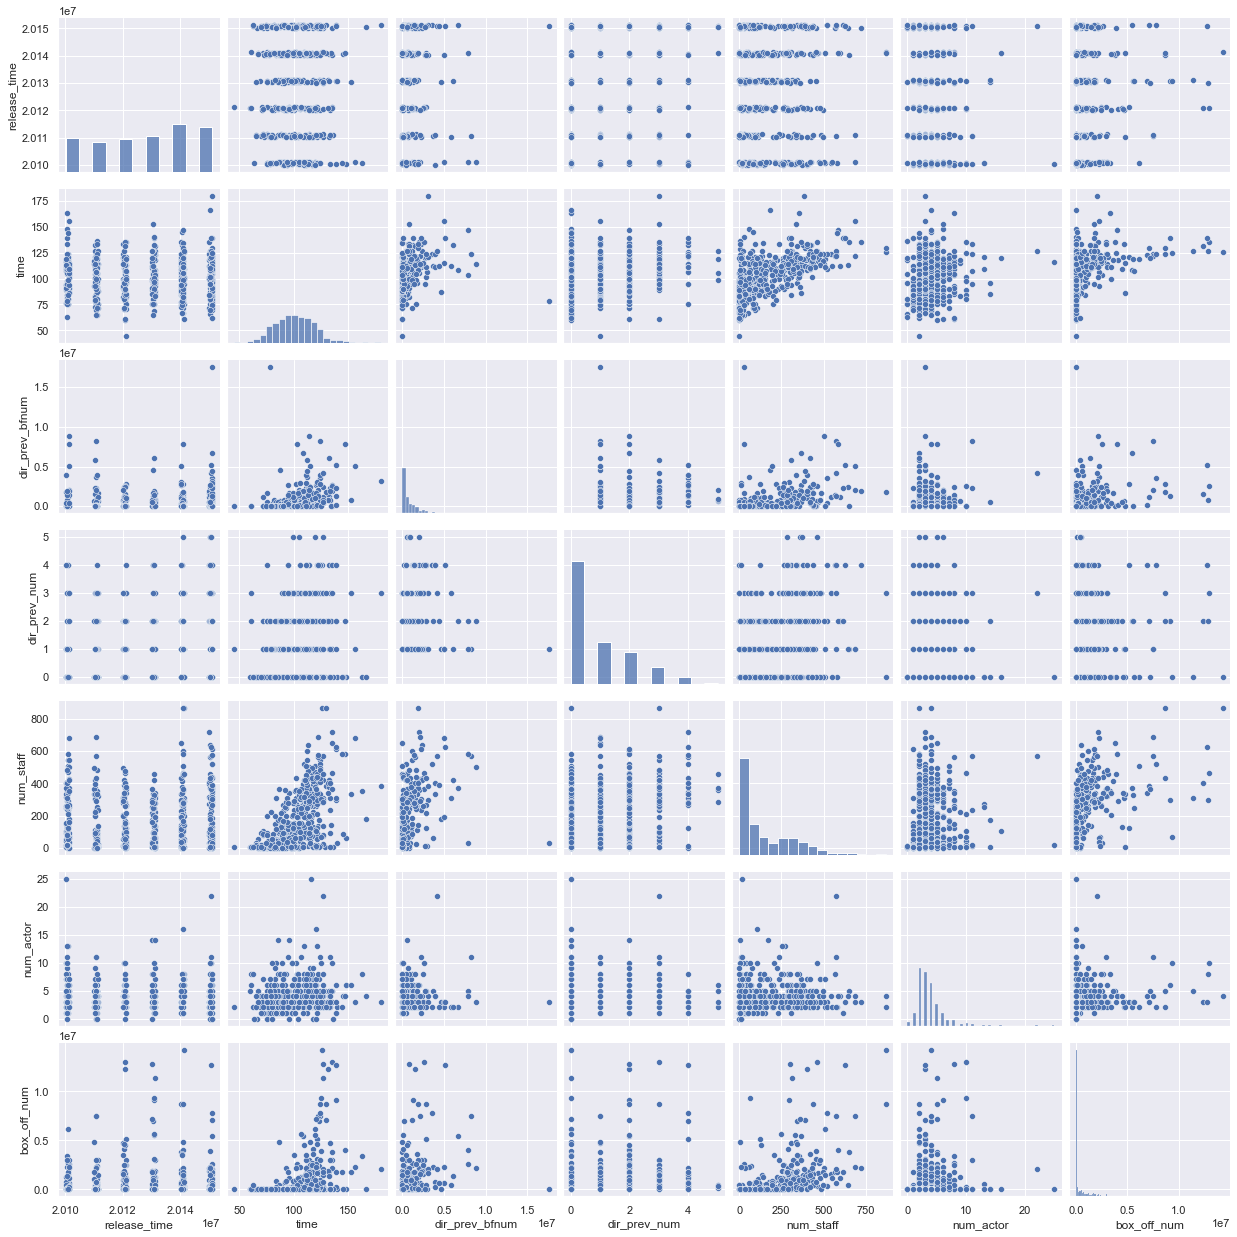

In [301]:
sns.pairplot(train, diag_kind='hist') #seabon 산점도 행렬

plt.show()

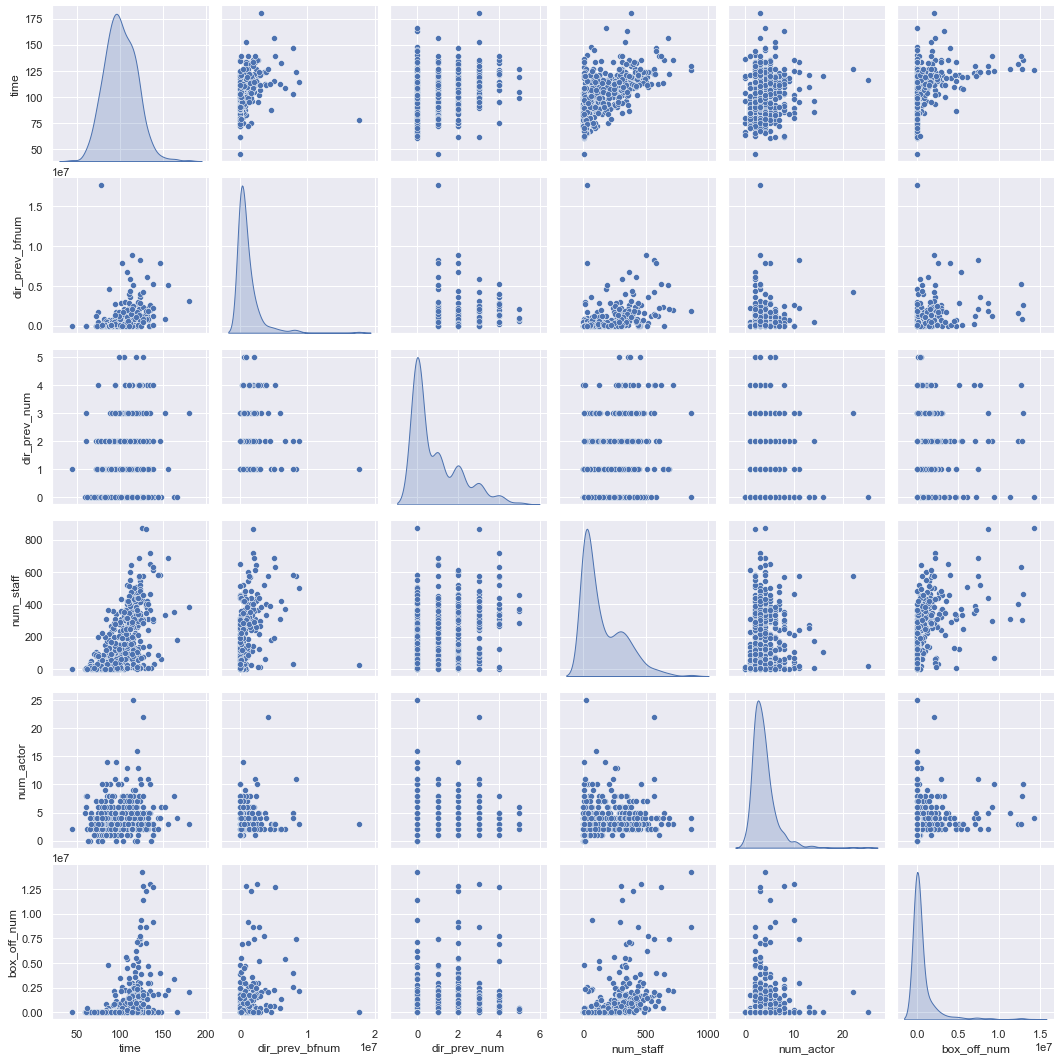

In [159]:
sns.pairplot(train, 

             diag_kind='kde',
             palette='bright') # pastel, bright, deep, muted, colorblind, dark

plt.show() #각 변수별 커널밀도함수

In [302]:
train.corr()

,release_time,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
release_time,1.0,-0.1,-0.0,0.1,-0.0,-0.1,-0.0
time,-0.1,1.0,0.3,0.3,0.6,0.1,0.4
dir_prev_bfnum,-0.0,0.3,1.0,0.1,0.3,0.1,0.3
dir_prev_num,0.1,0.3,0.1,1.0,0.5,0.0,0.3
num_staff,-0.0,0.6,0.3,0.5,1.0,0.1,0.5
num_actor,-0.1,0.1,0.1,0.0,0.1,1.0,0.1
box_off_num,-0.0,0.4,0.3,0.3,0.5,0.1,1.0


In [303]:
import seaborn as sns #히트맵 임포트

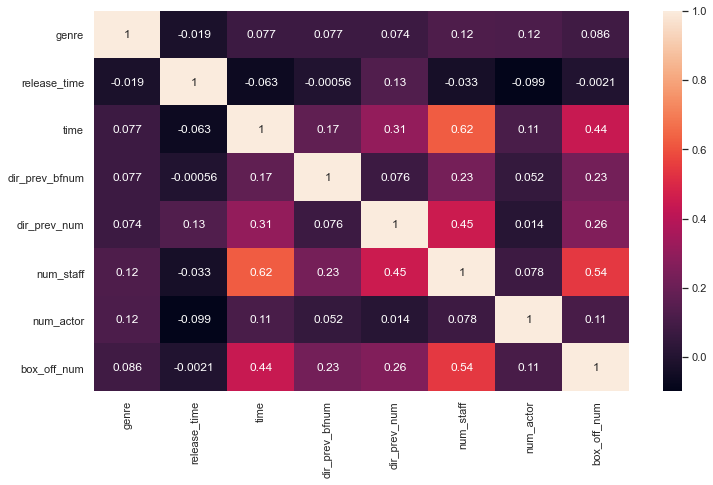

In [459]:
sns.heatmap(train.corr(), annot = True) #히트맵 그리기

sns.set(rc = {'figure.figsize':(12,7)})

### 전처리 과정

In [498]:
train.isna().sum() #결측치 확인

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
relese_time         0
Relese_time         0
Release_time        0
dtype: int64

In [307]:
train.isna().sum() / 600 #컬럼수로 나누면 %확인가능

title            0.0
distributor      0.0
genre            0.0
release_time     0.0
time             0.0
screening_rat    0.0
director         0.0
dir_prev_bfnum   0.6
dir_prev_num     0.0
num_staff        0.0
num_actor        0.0
box_off_num      0.0
dtype: float64

In [308]:
train.describe()

,release_time,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.0,600.0,270.0,600.0,600.0,600.0,600.0
mean,20128201.0,100.9,1050442.9,0.9,151.1,3.7,708181.8
std,17291.5,18.1,1791408.3,1.2,165.7,2.4,1828005.9
min,20100102.0,45.0,1.0,0.0,0.0,0.0,1.0
25%,20111011.2,89.0,20380.0,0.0,17.0,2.0,1297.2
50%,20130717.5,100.0,478423.6,0.0,82.5,3.0,12591.0
75%,20141016.0,114.0,1286568.6,2.0,264.0,4.0,479886.8
max,20151231.0,180.0,17615314.0,5.0,869.0,25.0,14262766.0


In [309]:
train[train['dir_prev_bfnum'].isna()] #결측값 있는 부분만 추출

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,20121122,96,청소년 관람불가,조병옥,nan,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,20130523,104,전체 관람가,이창재,nan,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,20140918,129,전체 관람가,정성복,nan,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,20120315,94,15세 관람가,변성현,nan,0,138,3,868
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,20150727,89,청소년 관람불가,조조 히데오,nan,0,0,4,745
...,...,...,...,...,...,...,...,...,...,...,...,...
593,낭만파 남편의 편지,퍼스트런,미스터리,20130912,97,청소년 관람불가,최위안,nan,0,5,3,1132
594,오빠가 돌아왔다,(주)마운틴픽쳐스,코미디,20140320,94,청소년 관람불가,노진수,nan,0,37,5,1958
597,살인의 강,(주)마운틴픽쳐스,공포,20100930,99,청소년 관람불가,김대현,nan,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,20150514,102,15세 관람가,백운학,nan,0,431,4,2192525


In [310]:
train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum() #중간에도 0으로 채워져있는지 확인, 0으로 잡혀있는 컬럼 확인(더한 것으로)

0

In [311]:
print(train['dir_prev_bfnum']) #해당 컬럼은 감독이 제작한 이전 영화 관객 관람 관객 수.

0           nan
1     1161602.5
2      220775.2
3       23894.0
4           1.0
         ...   
595      3833.0
596    496061.0
597         nan
598         nan
599         nan
Name: dir_prev_bfnum, Length: 600, dtype: float64


In [312]:
print(train.sort_values(by='dir_prev_bfnum', ascending=False))

           title      distributor   genre  release_time  time screening_rat  \
338  타부 : 금지된 사랑           고구마공작소  멜로/로맨스      20150903    78      청소년 관람불가   
214         초능력자           (주)NEW      SF      20101110   114       15세 관람가   
16            써니  CJ E&M Pictures     코미디      20110504   124       15세 관람가   
118      라스트 갓파더           영구아트무비     코미디      20101229   103       12세 관람가   
409      타짜-신의 손         롯데엔터테인먼트     드라마      20140903   147      청소년 관람불가   
..           ...              ...     ...           ...   ...           ...   
593   낭만파 남편의 편지             퍼스트런    미스터리      20130912    97      청소년 관람불가   
594     오빠가 돌아왔다        (주)마운틴픽쳐스     코미디      20140320    94      청소년 관람불가   
597        살인의 강        (주)마운틴픽쳐스      공포      20100930    99      청소년 관람불가   
598       악의 연대기        CJ 엔터테인먼트     느와르      20150514   102       15세 관람가   
599          베를린        CJ 엔터테인먼트      액션      20130130   120       15세 관람가   

    director  dir_prev_bfnum  dir_prev_num  num_sta

In [345]:
print(train.sort_values(by='dir_prev_bfnum')) # 이전 관객 수의 차이가 큼

           title      distributor   genre  release_time  time screening_rat  \
4           불량남녀     쇼박스(주)미디어플렉스     코미디      20101104   108       15세 관람가   
202     사랑해! 진영아            인디스토리     드라마      20131107   102       15세 관람가   
465     네버엔딩 스토리           화앤담이엔티  멜로/로맨스      20120118   114       15세 관람가   
186          나탈리         롯데엔터테인먼트  멜로/로맨스      20101028    88      청소년 관람불가   
552       자칼이 온다         롯데엔터테인먼트     코미디      20121115   107       15세 관람가   
..           ...              ...     ...           ...   ...           ...   
409      타짜-신의 손         롯데엔터테인먼트     드라마      20140903   147      청소년 관람불가   
118      라스트 갓파더           영구아트무비     코미디      20101229   103       12세 관람가   
16            써니  CJ E&M Pictures     코미디      20110504   124       15세 관람가   
214         초능력자           (주)NEW      SF      20101110   114       15세 관람가   
338  타부 : 금지된 사랑           고구마공작소  멜로/로맨스      20150903    78      청소년 관람불가   

    director  dir_prev_bfnum  dir_prev_num  num_sta

#### dir_prev_bfnum
 - 상관성을 낮게나마 살릴 수 있을 여지가 있음
 - 값들의 편차가 크고, 결측치를 어떻게 처리하는지에 따라 예측값이 달라질 것으로 추측
   -> z점수 표준화, 평균치 대입?

In [172]:
train['dir_prev_bfnum'].fillna(0, inplace = True) #결측치 채우기(0으로 채운 후 저장(inplace))

NameError: name 'mean' is not defined

In [314]:
train['dir_prev_bfnum'].fillna(train['dir_prev_bfnum'].mean(), inplace = True) #평균치

In [502]:
train.dropna(how='any', inplace=True) #결측치 있는 행 삭제

In [504]:
train.isna().sum()

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
box_off_num       0
relese_time       0
Relese_time       0
Release_time      0
dtype: int64

In [505]:
print(train)

                       title   distributor genre release_time  time  \
Release_time                                                          
2015-11-19              내부자들        (주)쇼박스   느와르   2015-11-19   130   
2013-06-05         은밀하게 위대하게        (주)쇼박스    액션   2013-06-05   123   
2012-07-12          나는 공무원이다        (주)NEW   코미디   2012-07-12   101   
2010-11-04              불량남녀  쇼박스(주)미디어플렉스   코미디   2010-11-04   108   
2012-10-25    강철대오 : 구국의 철가방      롯데엔터테인먼트   코미디   2012-10-25   113   
...                      ...           ...   ...          ...   ...   
2011-02-17           서유기 리턴즈     (주) 영화사조제    SF   2011-02-17    79   
2012-02-16               하울링     CJ 엔터테인먼트   느와르   2012-02-16   114   
2015-04-29             차이나타운      CGV아트하우스   느와르   2015-04-29   110   
2014-08-13                해무        (주)NEW   드라마   2014-08-13   111   
2013-03-14              파파로티        (주)쇼박스   드라마   2013-03-14   127   

             screening_rat director  dir_prev_bfnum  dir_prev_num  num_staff

In [32]:
test['dir_prev_bfnum'].fillna(0, inplace = True)

In [316]:
test['dir_prev_bfnum'].fillna(test['dir_prev_bfnum'].mean(), inplace = True) #평균치

In [ ]:
test.dropna(how='any', inplace=True) #결측치 있는 행 삭제

In [195]:
test.isna().sum() / 600

title            0.0
distributor      0.0
genre            0.0
release_time     0.0
time             0.0
screening_rat    0.0
director         0.0
dir_prev_bfnum   0.0
dir_prev_num     0.0
num_staff        0.0
num_actor        0.0
box_off_num      0.0
dtype: float64

## 모델링 과정

In [318]:
import lightgbm as lgb

In [37]:
# X(상영시간, 영화 제작에 참여한 스태프 수, 배우 수...)->Model->y(영화 관객 수)

In [319]:
model = lgb.LGBMRegressor(random_state=777, n_estimators=1000)

In [39]:
#랜덤 스테이트 : 똑같은 값이 어떤 컴퓨터에서 하든 나오게 만들기. n.estimator = 1000개를 반복해서 순차적으로 만들겠다.

In [40]:
#LightGBM = Trainning API, Scikit-learn API) 부스팅 모델, 순차적으로 만듦. 기존 모델이 못 맞춘 문제에 가중치를 두어 지속적으로 학습 이어나감.

In [320]:
features = ['time', 'dir_prev_num', 'num_staff', 'num_actor', 'release_time'] #features 변수에 5가지 컬럼 추가

In [321]:
target = ['box_off_num']

In [322]:
X_train, X_test, y_train = train[features], test[features], train[target] #taget은 y값, train의 x값과 test의 x값 적용

### 모델학습 및 검증

In [323]:
model.fit(X_train, y_train)

LGBMRegressor(n_estimators=1000, random_state=777)

In [324]:
singleLGBM = submission.copy()

In [325]:
singleLGBM.head()

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


In [326]:
singleLGBM['box_off_num'] = model.predict(X_test)

In [327]:
singleLGBM.to_csv('singleLGBM.csv', index = False)

In [50]:
#K-fold 교차검증 : 각각의 데이터를 등분하여 하나씩 학습에 사용하지 않고 모델을 검증할 때 사용(회귀분석에서의 전진선택, 후진선택과 비슷), 과대적합 방지, 모델 간 일반적 성능 비교 목적

In [51]:
#k_fold 교차검증

In [328]:
from sklearn.model_selection import KFold

In [329]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=777)

In [330]:
model = lgb.LGBMRegressor(random_state=777, n_estimators=1000)

In [331]:
for train_idx, val_idx in k_fold.split(X_train):
    print(train_idx,val_idx)
    break #값 겹치지 않게 5등분으로 나눔

[  0   1   2   3   4   5   6   7   8  10  11  13  14  15  16  17  19  20
  23  27  28  29  30  31  32  33  34  35  37  38  40  41  42  43  44  45
  48  49  50  51  53  57  58  59  60  61  62  63  64  65  66  67  68  70
  71  72  74  76  77  78  79  80  81  82  83  84  85  87  91  92  93  94
  95  98  99 100 102 103 104 105 107 108 109 110 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 129 130 131 133 136 137 138 139
 140 141 142 144 147 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 201 202 203 204 205 206 207 208 209 211 212 213 214 215 216 218 219
 220 221 223 224 225 226 227 228 229 230 231 232 233 237 238 239 240 242
 243 244 245 248 249 250 251 253 254 257 258 259 260 261 263 264 265 266
 268 270 271 272 274 276 277 278 279 280 282 285 286 288 292 294 295 296
 297 298 299 300 301 302 303 305 306 307 308 309 31

In [332]:
model = lgb.LGBMRegressor(random_state=777, n_estimators=1000)

models = []

for train_idx, val_idx in k_fold.split(X_train):
    x_t = X_train.iloc[train_idx]
    y_t = y_train.iloc[train_idx]
    x_val = X_train.iloc[val_idx]
    y_val = y_train.iloc[val_idx]
    
    models.append(model.fit(x_t, y_t, eval_set=(x_val, y_val), early_stopping_rounds=100, verbose =100))

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's l2: 2.64511e+12
[100]	valid_0's l2: 3.72533e+12
[100]	valid_0's l2: 3.13031e+12
[100]	valid_0's l2: 1.47191e+12
[100]	valid_0's l2: 1.7887e+12


In [333]:
models.append(model.fit(x_t, y_t, eval_set=(x_val, y_val), early_stopping_rounds=100, verbose =100)) #오렌지(학습)은 그냥 넣기. 초록색은 eval_로 놓기, early는 100번 진행하는 동안 학습이 감소되지 않으면 멈추라는 뜻), vervose는 100번째마다 모델 출력값 산출

[100]	valid_0's l2: 1.7887e+12


In [334]:
models

[LGBMRegressor(n_estimators=1000, random_state=777),
 LGBMRegressor(n_estimators=1000, random_state=777),
 LGBMRegressor(n_estimators=1000, random_state=777),
 LGBMRegressor(n_estimators=1000, random_state=777),
 LGBMRegressor(n_estimators=1000, random_state=777),
 LGBMRegressor(n_estimators=1000, random_state=777)]

In [335]:
preds = []
for model in models:
    preds.append(model.predict(X_test))
    len(preds) #for를 써서 각각의 model에 대한 predict 진행, preds 리스트에 저장(예측모델)

In [336]:
kfoldLightGBM = submission.copy()

In [337]:
preds

[array([3113115.11714104,  713866.61000027,  785397.67219467,
        1755754.04099999,  564227.12070694,   43318.60610356,
         150158.42852489,  107406.36024474,   48287.93387526,
         916945.57214532,  719918.92254045, 1359163.5639178 ,
         779947.79500182,   83363.95770065,  679900.92617112,
        2185065.01158542,   16789.77528685, 1530845.73103072,
          57032.16152046,  282536.11471277,   40994.98896546,
          21411.32644284,  700123.37727379,  158216.1480034 ,
         352339.96015252, 1050522.45555862,   91603.14153237,
         907621.72248386,  564678.73072863,  236476.69244849,
        1409732.97774635,   76099.42224013,  483333.7494599 ,
        2400080.68685047,   90185.52359076,  763170.80293764,
         293569.17435528,  114796.80249087,  126542.48632975,
          98014.22801413,  464327.16669238,  214993.98619558,
         294024.20255416,  806297.57220566,  794372.73930332,
         488853.45042762,  215152.47371544,  177551.36906915,
        

In [338]:
kfoldLightGBM['box_off_num'] = np.mean(preds, axis = 0) #축(axis)를 가지고 평균

In [339]:
kfoldLightGBM.head()

,title,box_off_num
0,용서는 없다,3113115.1
1,아빠가 여자를 좋아해,713866.6
2,하모니,785397.7
3,의형제,1755754.0
4,평행 이론,564227.1


In [340]:
kfoldLightGBM.to_csv('kfoldLightGBM.csv', index = False)

In [341]:
#Feature engineering

In [342]:
features

['time', 'dir_prev_num', 'num_staff', 'num_actor', 'release_time']

In [343]:
train.columns

Index(['title', 'distributor', 'genre', 'release_time', 'time',
       'screening_rat', 'director', 'dir_prev_bfnum', 'dir_prev_num',
       'num_staff', 'num_actor', 'box_off_num'],
      dtype='object')

In [344]:
train.genre #문자형으로 되어있음 

0       액션
1      느와르
2       액션
3      코미디
4      코미디
      ... 
595    드라마
596    드라마
597     공포
598    느와르
599     액션
Name: genre, Length: 600, dtype: object

In [346]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder() #라벨인코더 : 형태 변경
train['genre'] = le.fit_transform(train['genre']) #고유 단어에 번호 순차적 부여, 값으로 치환

In [347]:
train['genre']

0      10
1       2
2      10
3      11
4      11
       ..
595     4
596     4
597     1
598     2
599    10
Name: genre, Length: 600, dtype: int32

In [348]:
test['genre'] = le.transform(test['genre'])  #fit은 각각의 단어를 학습하는 과정, 다시 학습할 필요가 없으니 transform만 진행

In [460]:
features = ['time', 'dir_prev_num', 'num_staff', 'num_actor', 'dir_prev_bfnum', 'genre', 'release_time']

In [461]:
X_train, X_test, y_train = train[features], test[features], train[target]

In [462]:
model = lgb.LGBMRegressor(random_state=777, n_estimators=1000)

models = []

for train_idx, val_idx in k_fold.split(X_train):
    x_t = X_train.iloc[train_idx]
    y_t = y_train.iloc[train_idx]
    x_val = X_train.iloc[val_idx]
    y_val = y_train.iloc[val_idx]
    
    models.append(model.fit(x_t, y_t, eval_set=(x_val, y_val), early_stopping_rounds=100, verbose =100))

[100]	valid_0's l2: 2.55164e+12
[100]	valid_0's l2: 4.29638e+12
[100]	valid_0's l2: 3.15212e+12
[100]	valid_0's l2: 1.46071e+12
[100]	valid_0's l2: 1.57893e+12


In [463]:
X_test.head()

,time,dir_prev_num,num_staff,num_actor,dir_prev_bfnum,genre,release_time
0,125,2,304,3,300529.00000,2,20100107
1,113,4,275,3,342700.25000,5,20100114
2,115,3,419,7,4206610.66667,4,20100128
3,116,2,408,2,691342.00000,10,20100204
4,110,1,380,1,31738.00000,1,20100218


In [464]:
preds = []
for model in models:
    preds.append(model.predict(X_test))
    len(preds) #for를 써서 각각의 model에 대한 predict 진행, preds 리스트에 저장(예측모델)

In [465]:
feLightGBM = submission.copy()

In [466]:
feLightGBM['box_off_num'] = np.mean(preds, axis = 0)

In [467]:
feLightGBM.to_csv('feLightGBM.csv', index = False)

In [468]:
# Grid Search(모델튜닝) 모델 안에 여러 옵션이 존재하는데, 옵션이 바뀔 때마다 성능이 달라질 수 있음(ex : 하이퍼파라미터 변경 등)

In [469]:
from sklearn.model_selection import GridSearchCV

In [470]:
model = lgb.LGBMRegressor(random_state=777, n_estimators=1000)

params = {
    'learning_rate' : [0.1, 0.01, 0.003],
    'min_child_samples' : [20, 30]} #러닝레이트, 민차일드샘플 6개 조합, 러닝메이트 : 순차적 진행할 때 학습을 기존 모델의 것을 다음모델에 얼마나 반영할 것인가. min_child_samples : 파라미터 설정

gs = GridSearchCV(estimator=model,
            param_grid=params,
            scoring='neg_mean_squared_error',
            cv = k_fold) #그리드 객체 만들기, param_grid  : 저장, 

In [471]:
gs.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=777, shuffle=True),
             estimator=LGBMRegressor(n_estimators=1000, random_state=777),
             param_grid={'learning_rate': [0.1, 0.01, 0.003],
                         'min_child_samples': [20, 30]},
             scoring='neg_mean_squared_error')

In [472]:
gs.best_params_

{'learning_rate': 0.003, 'min_child_samples': 30}

In [473]:
model = lgb.LGBMRegressor(random=777, n_estimator=1000, learning_rate = 0.003, min_child_samples=30)

models = []

for train_idx, val_idx in k_fold.split(X_train):
    x_t = X_train.iloc[train_idx]
    y_t = y_train.iloc[train_idx]
    x_val = X_train.iloc[val_idx]
    y_val = y_train.iloc[val_idx]
    
    models.append(model.fit(x_t, y_t, eval_set=(x_val, y_val), early_stopping_rounds=100, verbose = 100))


[100]	valid_0's l2: 2.56518e+12
[100]	valid_0's l2: 4.88857e+12
[100]	valid_0's l2: 3.14977e+12
[100]	valid_0's l2: 1.61193e+12
[100]	valid_0's l2: 1.9668e+12


In [474]:
preds = []
for model in models:
    preds.append(model.predict(X_test))

In [475]:
gs.best_score_

-2277925972012.6616

In [97]:
gslgbm = submission.copy()

In [98]:
gslgbm['box_off_num'] = np.mean(preds, axis = 0)

In [101]:
gslgbm.to_csv('gslgbm.csv', index = False)

In [446]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

f1 = gs.best_score_(gs.best_score_, preds)
print(accuracy_score(y_train, preds))
print(recall_score(y_train, preds))
print(precision_score(y_train, preds))
print(f1_score(y_train, preds))

TypeError: 'numpy.float64' object is not callable

## K-최근접 이웃 회귀

In [376]:
from sklearn.neighbors import KNeighborsRegressor

In [406]:
regressor = KNeighborsRegressor(n_neighbors = 3, weights = "distance")
regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3, weights='distance')

In [407]:
# Returns a list of predicted classes - one prediction for every data point
predictions = your_model.predict(X_train)
# For every data point, returns a list of probabilities of each class
probabilities = your_model.predict_proba(X_train)

In [408]:
print(regressor.predict)

<bound method KNeighborsRegressor.predict of KNeighborsRegressor(n_neighbors=3, weights='distance')>


In [413]:
preds2 = []
for model in models:
    preds2.append(model.predict(X_train))

In [414]:
print(preds2)

[array([ 572850.52496654, 1635668.39081237, 1176129.0231738 ,
        572155.53553163,  782029.16946112,  782029.16946112,
        565095.13980844,  756752.13650159, 1155365.09181082,
        556130.58470026,  538781.86938456,  541244.62226949,
        676372.24551975,  657762.76723447,  556130.58470026,
        540511.99165865, 1635668.39081237,  585663.21279804,
        756752.13650159,  596116.74532715, 1001981.44743699,
        556130.58470026,  542004.13036574,  781700.20070977,
        571908.01374556,  596116.74532715,  542788.69040991,
        538781.86938456,  782029.16946112,  538946.91470647,
       1001981.44743699,  543796.87419067,  573197.06453666,
        538832.92740646,  759538.22140368,  539378.70687875,
        539695.36613733, 1155365.09181082,  544313.88336355,
       1014926.50347952,  543875.17303638,  555978.13553158,
        539033.15305156,  543936.24483471, 1001981.44743699,
        585663.21279804,  596116.74532715,  756752.13650159,
        759538.22140368

In [417]:
print(regressor.score(X_train, y_train)) #타깃이 평균정도 예측하면 0에 수렴, 예측을 잘 하게되면 1에 수렴 -> 훈련에 사용한 데이터를 예측에 그대로 사용할 경우 높게 나타남, 분리 필요

0.999999999960232


In [449]:
print(regressor.predict(X_train))

[[2.3398000e+04]
 [7.0725010e+06]
 [6.9590830e+06]
 [2.1786600e+05]
 [4.8338700e+05]
 [2.3321100e+05]
 [5.3526000e+04]
 [1.1105230e+06]
 [4.7780000e+03]
 [8.6800000e+02]
 [7.4500000e+02]
 [1.0790000e+03]
 [5.8510000e+03]
 [2.3052000e+04]
 [9.2404000e+04]
 [3.9317000e+04]
 [7.4537150e+06]
 [5.6930000e+03]
 [8.1457000e+05]
 [5.7029000e+04]
 [1.6245730e+06]
 [4.4074000e+04]
 [9.1400000e+02]
 [7.8151600e+05]
 [1.1760000e+03]
 [3.0940000e+03]
 [2.8070000e+03]
 [7.4500000e+02]
 [1.6073400e+05]
 [3.4600000e+03]
 [7.3729000e+04]
 [5.2100000e+02]
 [2.8508400e+05]
 [3.9000000e+02]
 [3.0094060e+06]
 [4.5860000e+03]
 [2.9230000e+03]
 [1.0142000e+04]
 [2.7030000e+03]
 [1.7262270e+06]
 [9.0890000e+03]
 [3.8809000e+04]
 [7.4200000e+02]
 [3.7720000e+03]
 [2.7230280e+06]
 [1.2090000e+03]
 [2.7083000e+04]
 [3.2164100e+05]
 [1.1774350e+06]
 [2.1939000e+04]
 [7.2000000e+01]
 [1.5155000e+05]
 [1.5687000e+04]
 [3.5857000e+04]
 [1.1200000e+02]
 [9.8628700e+05]
 [2.4100000e+03]
 [5.1400000e+02]
 [1.0123100e+0

In [444]:
pd.options.display.float_format = '{:.5f}'.format

In [442]:
pd.reset_option('display.float_format')

## 시계열 분석

In [481]:
import warnings

In [482]:
warnings.filterwarnings('ignore')

In [483]:
import statsmodels.api as sm

In [484]:
from scipy import stats

In [485]:
from sklearn.model_selection import train_test_split # 모델 분리 코드

In [486]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score, mean_absolute_error 

In [493]:
if 'release_time' in train.columns:
    train['release_time'] = pd.to_datetime(train['release_time'])
    train['Release_time'] = pd.to_datetime(train['release_time'])
train.info()

if train.index.dtype=='int64':
    train.set_index('Release_time', inplace = True)
train

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 600 entries, 2012-11-22 to 2013-01-30
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           600 non-null    object        
 1   distributor     600 non-null    object        
 2   genre           600 non-null    object        
 3   release_time    600 non-null    datetime64[ns]
 4   time            600 non-null    int64         
 5   screening_rat   600 non-null    object        
 6   director        600 non-null    object        
 7   dir_prev_bfnum  270 non-null    float64       
 8   dir_prev_num    600 non-null    int64         
 9   num_staff       600 non-null    int64         
 10  num_actor       600 non-null    int64         
 11  box_off_num     600 non-null    int64         
 12  relese_time     600 non-null    datetime64[ns]
 13  Relese_time     600 non-null    datetime64[ns]
 14  Release_time    600 non-null    datetim

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,relese_time,Relese_time,Release_time
Release_time,,,,,,,,,,,,,,,
2012-11-22,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,nan,0,91,2,23398,2012-11-22,2012-11-22,2012-11-22
2015-11-19,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50000,2,387,3,7072501,2015-11-19,2015-11-19,2015-11-19
2013-06-05,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25000,4,343,4,6959083,2013-06-05,2013-06-05,2013-06-05
2012-07-12,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00000,2,20,6,217866,2012-07-12,2012-07-12,2012-07-12
2010-11-04,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00000,1,251,2,483387,2010-11-04,2010-11-04,2010-11-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-08-13,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00000,1,510,7,1475091,2014-08-13,2014-08-13,2014-08-13
2013-03-14,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00000,1,286,6,1716438,2013-03-14,2013-03-14,2013-03-14
2010-09-30,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,nan,0,123,4,2475,2010-09-30,2010-09-30,2010-09-30


In [506]:
train.isnull().sum()

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
box_off_num       0
relese_time       0
Relese_time       0
Release_time      0
dtype: int64

In [508]:
train.sort_index(ascending=False)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,relese_time,Relese_time,Release_time
Release_time,,,,,,,,,,,,,,,
2015-12-31,내부자들: 디 오리지널,(주)쇼박스,느와르,2015-12-31,180,청소년 관람불가,우민호,3131902.00000,3,382,3,2084844,2015-12-31,2015-12-31,2015-12-31
2015-12-30,조선마술사,롯데엔터테인먼트,드라마,2015-12-30,122,12세 관람가,김대승,1347413.75000,4,574,2,627586,2015-12-30,2015-12-30,2015-12-30
2015-12-16,대호,(주)NEW,드라마,2015-12-16,139,12세 관람가,박훈정,2270048.50000,2,612,1,1762733,2015-12-16,2015-12-16,2015-12-16
2015-12-16,히말라야,CJ 엔터테인먼트,드라마,2015-12-16,124,12세 관람가,이석훈,3549473.00000,4,520,2,7759711,2015-12-16,2015-12-16,2015-12-16
2015-12-10,파일:4022일의 사육,골든타이드픽처스,미스터리,2015-12-10,92,청소년 관람불가,박용집,695201.50000,2,103,3,1414,2015-12-10,2015-12-10,2015-12-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-04-01,폭풍전야,오퍼스픽쳐스,멜로/로맨스,2010-04-01,104,청소년 관람불가,조창호,1047.00000,1,239,2,51760,2010-04-01,2010-04-01,2010-04-01
2010-03-25,비밀애,시너지,멜로/로맨스,2010-03-25,111,청소년 관람불가,류훈,1799447.00000,1,333,2,164252,2010-03-25,2010-03-25,2010-03-25
2010-03-18,육혈포 강도단,전망좋은영화사,느와르,2010-03-18,107,15세 관람가,강효진,37518.00000,1,318,3,1214237,2010-03-18,2010-03-18,2010-03-18


In [517]:
import matplotlib.pyplot as py

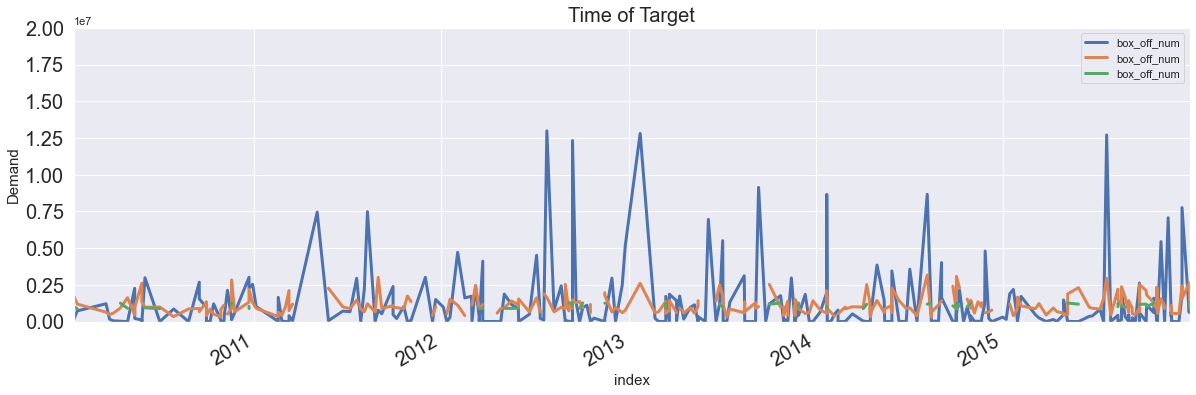

In [525]:
pd.concat([train[['box_off_num']],
         train[['box_off_num']].rolling(24).mean(),
         train[['box_off_num']].rolling(24*7).mean()], axis = 1).plot(kind = 'line', figsize = (20,6), linewidth = 3, fontsize = 20,
                                                              xlim=('2010-01-14', '2015-12-31'), ylim= (0, 20000000))

plt.title("Time of Target", fontsize = 20)
plt.xlabel("index", fontsize = 15)
plt.ylabel("Demand", fontsize = 15)
plt.show()

In [512]:
print(train('dir_prev_bfnum'))

TypeError: 'DataFrame' object is not callable

시계열 예측(시간이 지남에 따라 어떻게 변하는지)

In [527]:
y_diff = train[['box_off_num']].diff()
y_diff.fillna(method = 'bfill', inplace = True)
y_diff.fillna(method = 'ffill', inplace = True)
y_diff.columns = ['box_off_num_diff']
if 'box_off_num_diff' not in train.columns :
    train = pd.concat([train, y_diff], axis = 1)
train

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,relese_time,Relese_time,Release_time,box_off_num_diff
Release_time,,,,,,,,,,,,,,,,
2015-11-19,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50000,2,387,3,7072501,2015-11-19,2015-11-19,2015-11-19,-113418.00000
2013-06-05,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25000,4,343,4,6959083,2013-06-05,2013-06-05,2013-06-05,-113418.00000
2012-07-12,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00000,2,20,6,217866,2012-07-12,2012-07-12,2012-07-12,-6741217.00000
2010-11-04,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00000,1,251,2,483387,2010-11-04,2010-11-04,2010-11-04,265521.00000
2012-10-25,강철대오 : 구국의 철가방,롯데엔터테인먼트,코미디,2012-10-25,113,15세 관람가,육상효,837969.00000,2,262,4,233211,2012-10-25,2012-10-25,2012-10-25,-250176.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-02-17,서유기 리턴즈,(주) 영화사조제,SF,2011-02-17,79,전체 관람가,신재호,67602.00000,1,220,4,12696,2011-02-17,2011-02-17,2011-02-17,-184299.00000
2012-02-16,하울링,CJ 엔터테인먼트,느와르,2012-02-16,114,15세 관람가,유하,2061296.66667,3,288,2,1612554,2012-02-16,2012-02-16,2012-02-16,1599858.00000
2015-04-29,차이나타운,CGV아트하우스,느와르,2015-04-29,110,청소년 관람불가,한준희,597497.00000,3,420,3,1472147,2015-04-29,2015-04-29,2015-04-29,-140407.00000
